<a href="https://colab.research.google.com/github/Ashwinikh297/R.Discriptive-Statistics/blob/main/99acres_Price%20Analysis(Ds%20Project%202).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Real Estate (99acres.com) Price Analysis

## 1. Import Libraries

In [1]:
import folium
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from geopy.geocoders import ArcGIS

import warnings
warnings.filterwarnings('ignore')

## 2. Load the Dataset

In [2]:
mum_prop = pd.read_csv('/content/Mumbai_Property (1) (1) (2).csv')

### 2.1 Know more about dataset

In [3]:
mum_prop.head()

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,W E Highway Malad East Mumbai,Highway Malad,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0
1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0
2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0
3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0
4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0


In [4]:
mum_prop.shape

(2580, 12)

In [5]:
mum_prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  2580 non-null   object 
 1   Location       2580 non-null   object 
 2   Region         2580 non-null   object 
 3   Property_Age   2580 non-null   object 
 4   Availability   2580 non-null   object 
 5   Area_Tpye      2580 non-null   object 
 6   Area_SqFt      2580 non-null   float64
 7   Rate_SqFt      2580 non-null   int64  
 8   Floor_No       2580 non-null   int64  
 9   Bedroom        2580 non-null   int64  
 10  Bathroom       2580 non-null   int64  
 11  Price_Lakh     2580 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 242.0+ KB


In [6]:
mum_prop.Region.value_counts().head(20)

Central Mumbai               225
Mira Road                    201
Kharghar Navi-Mumbai         196
Ulwe Navi-Mumbai             174
Mumbai Thane                 166
Mumbai Harbour               104
Dombivli Thane                82
Hiranandani-Estate Thane      79
Ghansoli Navi-Mumbai          76
Kamothe Navi-Mumbai           64
Panvel Navi-Mumbai            61
Road Thane                    47
Kandivali Mumbai              44
Manpada Thane                 42
Thane Thane                   41
Koparkhairane Navi-Mumbai     39
Parel Mumbai                  36
Malad Mumbai                  31
Taloja Navi-Mumbai            31
Naupada Thane                 30
Name: Region, dtype: int64

In [7]:
mum_prop.describe().round(2)

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2580.00,2580.00,2580.00,2580.00,2580.00,2580.00
mean,1026.11,19111.85,8.84,1.96,2.07,174.39
std,2287.13,40760.88,8.10,0.84,0.75,369.48
min,33.57,84.00,-1.00,1.00,1.00,13.00
25%,630.75,8791.75,3.00,1.00,2.00,67.00
50%,850.00,13785.00,6.00,2.00,2.00,111.50
75%,1156.00,22650.00,12.00,2.00,2.00,200.00
max,100000.00,1650000.00,59.00,6.00,7.00,16500.00


In [8]:
Q1 = np.quantile(mum_prop.Area_SqFt,0.02)
Q3 = np.quantile(mum_prop.Area_SqFt,0.98)
med = np.median(mum_prop.Area_SqFt)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
outliers1 = mum_prop.Area_SqFt[(mum_prop.Area_SqFt <= lower_bound) | (mum_prop.Area_SqFt >= upper_bound)]

mum_prop = mum_prop.drop(outliers1.index).reset_index(drop=True)

In [9]:
Q1 = np.quantile(mum_prop.Rate_SqFt,0.02)
Q3 = np.quantile(mum_prop.Rate_SqFt,0.80)
med = np.median(mum_prop.Rate_SqFt)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
outliers1 = mum_prop.Rate_SqFt[(mum_prop.Rate_SqFt <= lower_bound) | (mum_prop.Rate_SqFt >= upper_bound)]

mum_prop = mum_prop.drop(outliers1.index).reset_index(drop=True)

In [10]:
mum_prop.describe().round(2)

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2538.00,2538.00,2538.00,2538.00,2538.00,2538.00
mean,948.95,16546.14,8.79,1.95,2.05,161.27
std,486.53,10192.02,7.98,0.83,0.73,162.12
min,185.00,1808.00,-1.00,1.00,1.00,13.00
25%,634.25,8762.25,3.00,1.00,2.00,66.25
50%,850.00,13629.50,6.00,2.00,2.00,110.00
75%,1150.00,22278.75,12.00,2.00,2.00,196.75
max,5000.00,55611.00,55.00,6.00,7.00,1900.00


In [11]:
mum_prop.duplicated().sum()

7

In [12]:
mum_prop = mum_prop.drop_duplicates(ignore_index=True)

In [13]:
mum_prop.isna().sum()

Property_Name    0
Location         0
Region           0
Property_Age     0
Availability     0
Area_Tpye        0
Area_SqFt        0
Rate_SqFt        0
Floor_No         0
Bedroom          0
Bathroom         0
Price_Lakh       0
dtype: int64

In [14]:
mum_prop.shape

(2531, 12)

In [15]:
mum_prop.to_csv('Final_Project.csv', index_label = False)

## 3. Data Visualization

### 3.1 Set the rcParams for all next Visualization

In [16]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

### 3.2 Hunting Outliers

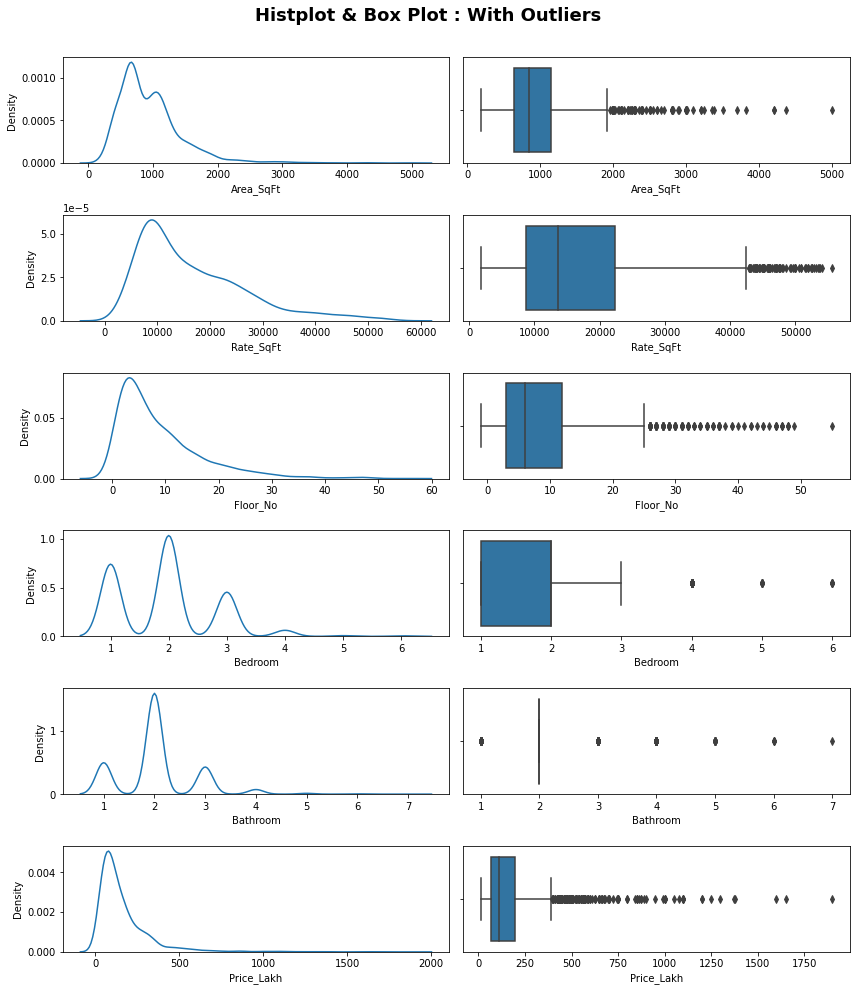

In [17]:
fig, ax = plt.subplots(6,2, figsize = (12,14))

fig.suptitle('Histplot & Box Plot : With Outliers', size = 18, fontweight="bold")
sns.kdeplot(ax= ax[0,0], data = mum_prop, x = 'Area_SqFt')
sns.boxplot(ax= ax[0,1], data = mum_prop, x = 'Area_SqFt')
sns.kdeplot(ax= ax[1,0], data = mum_prop, x = 'Rate_SqFt')
sns.boxplot(ax= ax[1,1], data = mum_prop, x = 'Rate_SqFt')
sns.kdeplot(ax= ax[2,0], data = mum_prop, x = 'Floor_No')
sns.boxplot(ax= ax[2,1], data = mum_prop, x = 'Floor_No')
sns.kdeplot(ax= ax[3,0], data = mum_prop, x = 'Bedroom')
sns.boxplot(ax= ax[3,1], data = mum_prop, x = 'Bedroom')
sns.kdeplot(ax= ax[4,0], data = mum_prop, x = 'Bathroom')
sns.boxplot(ax= ax[4,1], data = mum_prop, x = 'Bathroom')
sns.kdeplot(ax= ax[5,0], data = mum_prop, x = 'Price_Lakh')
sns.boxplot(ax= ax[5,1], data = mum_prop, x = 'Price_Lakh')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

fig.savefig('Outliers', dpi = 500)

## Obeservation :
**Based on data following colums has most outliers & mostly left skewed data:**

- Price_Lakh
- Area_SqFt
- Rate_SqFt
- Floor_No

## 4. Heatmap

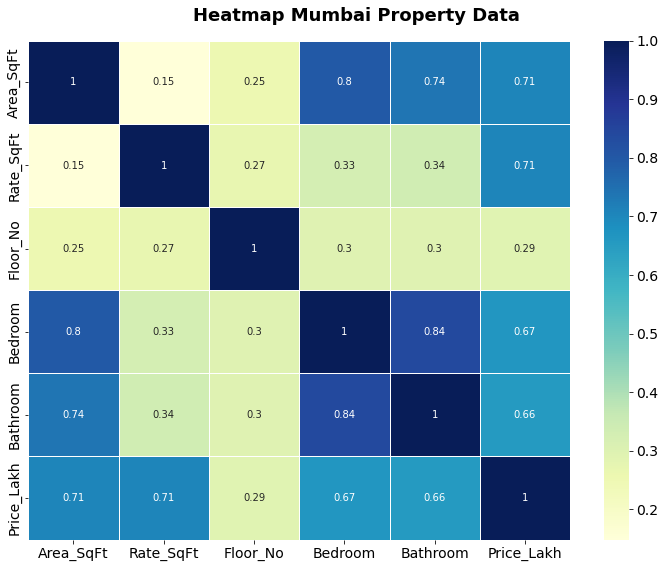

In [18]:
fig = plt.figure(figsize=(10,8))

sns.heatmap(mum_prop.corr(), annot = True, cmap='YlGnBu', linewidth=.5)
fig.suptitle('Heatmap Mumbai Property Data',fontsize=18, fontweight="bold")
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

fig.savefig('Heatmap', dpi = 250)

## 5. Exploratory Data Analysis
    Convert all variable into following categories

    1 Binary Variables
    2 Ordinal Varibles
    3 Continous Data
    4 Target Variable

### 5.1 Checking for Binary, Oridinal, Continous Data & Target Column

In [19]:
num_columns = mum_prop.describe().columns
categorical_cols = mum_prop.describe(include= 'object').columns

In [20]:
mum_prop.nunique()

Property_Name     894
Location         1294
Region            209
Property_Age       12
Availability        2
Area_Tpye           4
Area_SqFt         696
Rate_SqFt        1990
Floor_No           52
Bedroom             6
Bathroom            7
Price_Lakh        467
dtype: int64

In [21]:
binary_variables = [i  for i in mum_prop.columns  if (len(mum_prop[i].unique()) == 2)]

In [22]:
binary_variables

['Availability']

In [23]:
ordinal_variables=[i for i in mum_prop.columns if ((len(mum_prop[i].unique()) > 2 ) and (len(mum_prop[i].unique()) <= 53))]

In [24]:
ordinal_variables

['Property_Age', 'Area_Tpye', 'Floor_No', 'Bedroom', 'Bathroom']

In [25]:
continous_variable = [i for i in mum_prop.columns if ((len(mum_prop[i].unique()) > 53))]
continous_variable = continous_variable[3:-1] # Remove Price and Location from data

In [26]:
continous_variable

['Area_SqFt', 'Rate_SqFt']

In [27]:
target_variable = 'Price_Lakh'

In [28]:
target_variable

'Price_Lakh'

## 6. Binary Variable

In [29]:
print(binary_variables)
print('Element in binary category :', len(binary_variables))

['Availability']
Element in binary category : 1


### 6.1 Availability Count

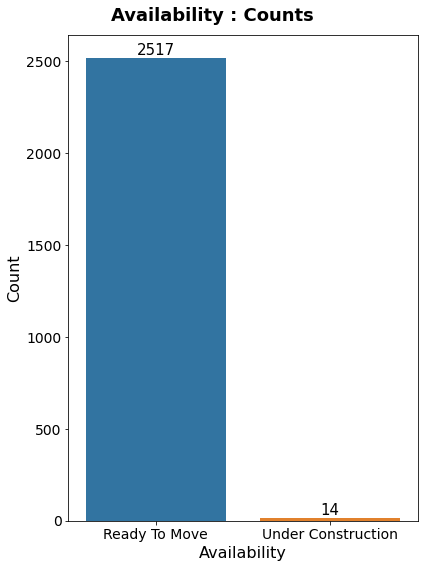

In [30]:
fig = plt.figure(figsize=(6,8))

plot = sns.barplot(data =mum_prop , x = mum_prop.Availability.value_counts().index,
            y = mum_prop.Availability.value_counts().values)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width()/2, bar.get_height()),
                  ha='center', va='center', size=15, xytext=(0,8), textcoords='offset points')

fig.suptitle('Availability : Counts',fontsize=18, fontweight="bold")
plt.xlabel('Availability',)
plt.ylabel('Count')

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

fig.savefig('Availability_Bar', dpi = 500)

## 7. Ordinal Variables

In [31]:
print(ordinal_variables)
print('Number of ordinal features is :', len(ordinal_variables))

['Property_Age', 'Area_Tpye', 'Floor_No', 'Bedroom', 'Bathroom']
Number of ordinal features is : 5


### 7.1 Price with respect to Property Age

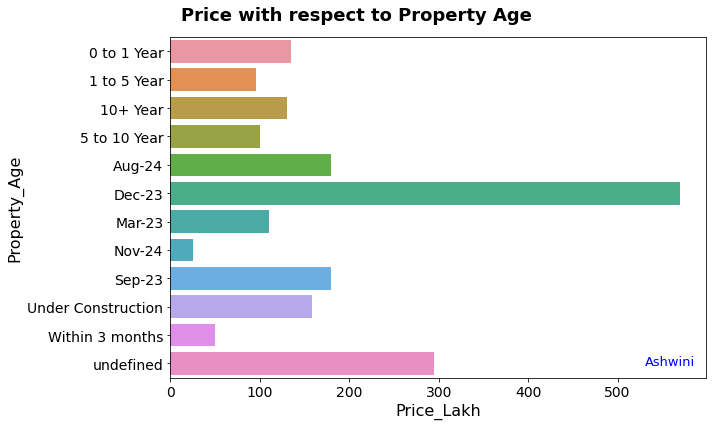

In [34]:
fig = plt.figure(figsize=(10,6))

sns.barplot(data = mum_prop , x = mum_prop.groupby('Property_Age').median().Price_Lakh , y = mum_prop.groupby('Property_Age').median().index)
fig.suptitle('Price with respect to Property Age', fontsize= 18, fontweight="bold")
fig.text(0.9, 0.15,'Ashwini', fontsize = 13, color ='blue')
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

fig.savefig('Property_Age_Price_Bar', dpi = 500)

### 7.2 Price with respect to Bed & Bath

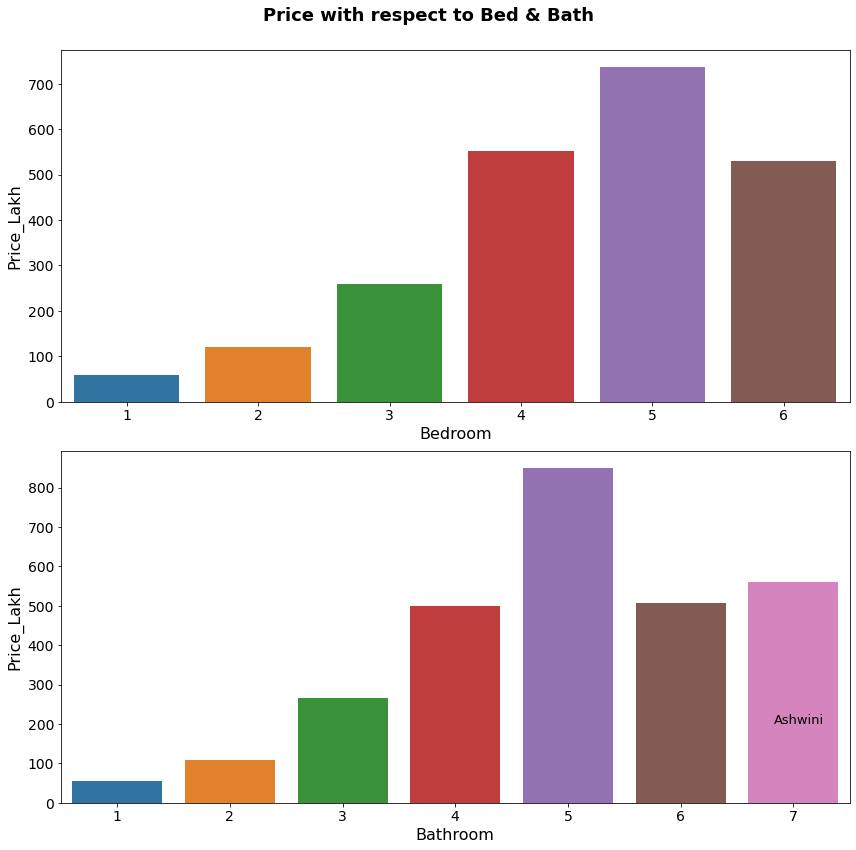

In [39]:
fig, ax = plt.subplots(2,1, figsize = (12,12))

sns.barplot(ax= ax[0], data =mum_prop , x = mum_prop.groupby('Bedroom').median().index, y = mum_prop.groupby('Bedroom').median().Price_Lakh)
sns.barplot(ax= ax[1], data = mum_prop , x = mum_prop.groupby('Bathroom').median().index, y = mum_prop.groupby('Bathroom').median().Price_Lakh)
fig.suptitle('Price with respect to Bed & Bath', size = 18, fontweight="bold")
fig.text(0.9, 0.15,'Ashwini', fontsize = 13, color ='black')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

fig.savefig('BednBath_Price_Bar', dpi = 500)

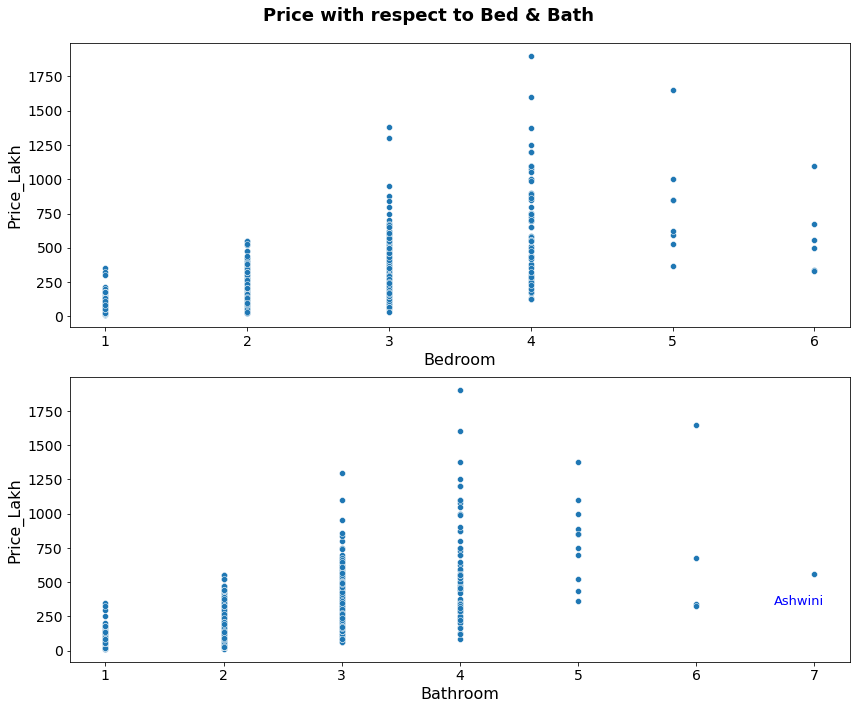

In [40]:
fig, ax = plt.subplots(2,1, figsize = (12,10))

sns.scatterplot(ax= ax[0], data = mum_prop , x = mum_prop['Bedroom'], y = mum_prop['Price_Lakh'])
sns.scatterplot(ax= ax[1], data = mum_prop , x = mum_prop['Bathroom'], y = mum_prop['Price_Lakh'])
fig.suptitle('Price with respect to Bed & Bath', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Ashwini', fontsize = 13, color ='blue')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

fig.savefig('Bed_Bath_Price_Scatter', dpi = 500)

### 7.3 Area Type Distribution

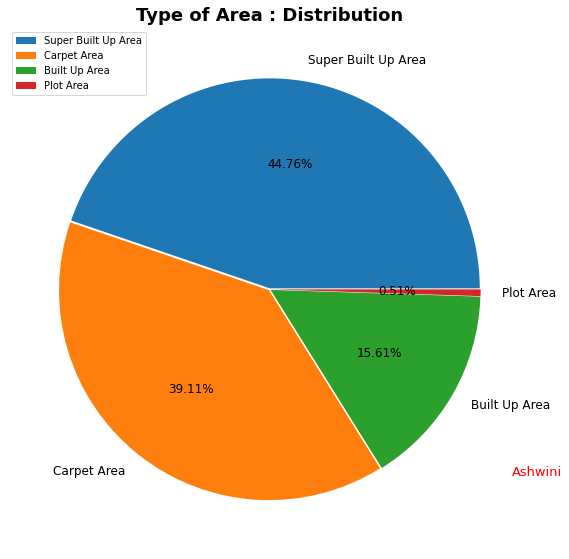

In [41]:
fig = plt.figure(figsize = (8,8))
plt.pie(mum_prop['Area_Tpye'].value_counts(),
       labels=['Super Built Up Area','Carpet Area','Built Up Area','Plot Area'],
       autopct= '%.2f%%', textprops = {'size':'large'},explode = [0.005,0.005,0.005,0.005])
plt.legend(loc= 'upper left')
plt.title("Type of Area : Distribution", fontsize = 18, fontweight = 'bold')
fig.text(0.9, 0.15, 'Ashwini', fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

fig.savefig('Area_Type_Distribution', dpi = 500)

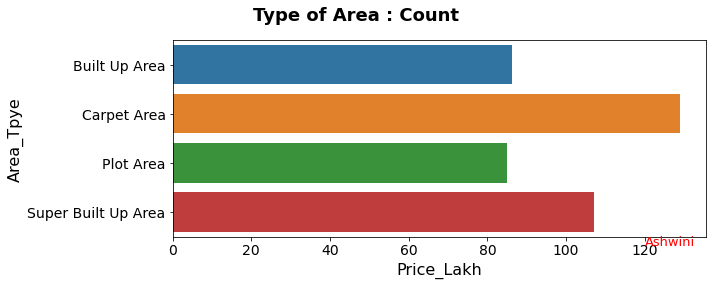

In [42]:
fig = plt.figure(figsize=(10,4))

sns.barplot(data =mum_prop , x =mum_prop.groupby('Area_Tpye').median().Price_Lakh, y =mum_prop.groupby('Area_Tpye').median().index)
fig.suptitle('Type of Area : Count', fontsize= 18, fontweight="bold")
fig.text(0.9, 0.15, 'Ashwini', fontsize = 13, color ='red')
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

fig.savefig('Area_Type_Count_Bar', dpi = 500)

### 7.4 Price with respect to Floor Numbers

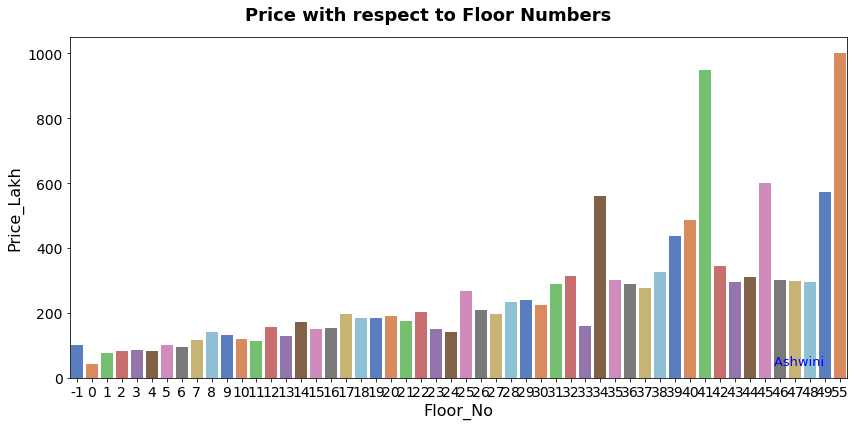

In [43]:
fig = plt.figure(figsize=(12,6))
params = {'xtick.labelsize':'8','ytick.labelsize':'14','axes.labelsize':'16'}

sns.barplot(data= mum_prop, x= mum_prop.groupby('Floor_No').median().index, y= mum_prop.groupby('Floor_No').median().Price_Lakh, palette= 'muted')
fig.suptitle('Price with respect to Floor Numbers', fontsize= 18, fontweight="bold")
fig.text(0.9, 0.15, 'Ashwini ', fontsize = 13, color ='blue')
pylab.rcParams.update(params)
fig.tight_layout()
plt.show()

fig.savefig('Property_Floor_Numbers_Bar', dpi = 500)

### From above visualization we have concluded following points for higher Price.

   1. As number of bedroom increased price also has incresed
   2. As floor number goes higher price also increased
   3. 4 BHK and 5 BHK price higher
   4. Plot Area criteria is higher price
   5. Upcoming New Project prices are higher

## 8. Continous Variables

In [45]:
for i in continous_variable:
    print("Length of", i,":", len(mum_prop[i].unique()))

Length of Area_SqFt : 696
Length of Rate_SqFt : 1990


### 8.1 Price with respect to SqFt Area

### 8.2 Data visualization for 'Rate_SqFt' for Location 'Mira Road'
**Note here its normal distribuation of data so outlier removal using stad deviation and mean works perfectly here**

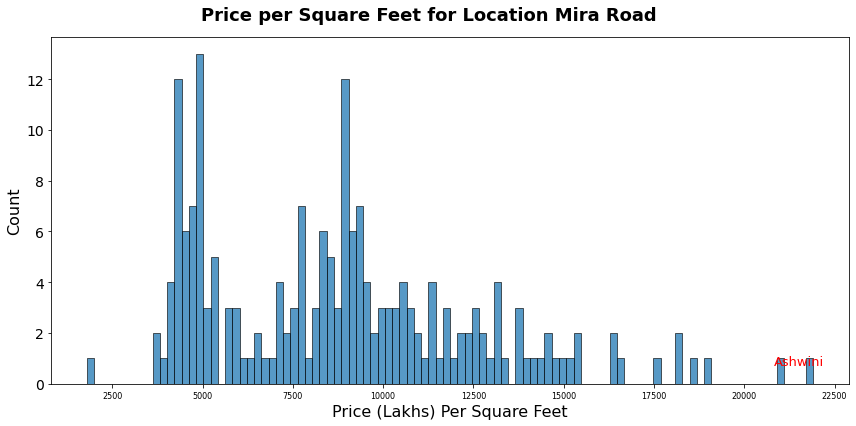

In [48]:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Price per Square Feet for Location Mira Road', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Ashwini', fontsize = 13, color ='red')

sns.histplot(mum_prop[mum_prop.Region == "Mira Road"].Rate_SqFt ,bins=100)
plt.xlabel("Price (Lakhs) Per Square Feet")
plt.ylabel("Count")

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

fig.savefig('Rate_SqFt_Bar', dpi = 500)

## 9. Target Varible

In [49]:
mum_prop['Price_Cat'] = pd.cut(x = mum_prop['Price_Lakh'], bins = [13,70,190,16500], labels=['Low','Medium','High'], right = False)
mum_prop.Price_Cat.value_counts()

Medium    1187
High       674
Low        670
Name: Price_Cat, dtype: int64

### Checking for Imbalanced or balanced dataset with regards to the Target

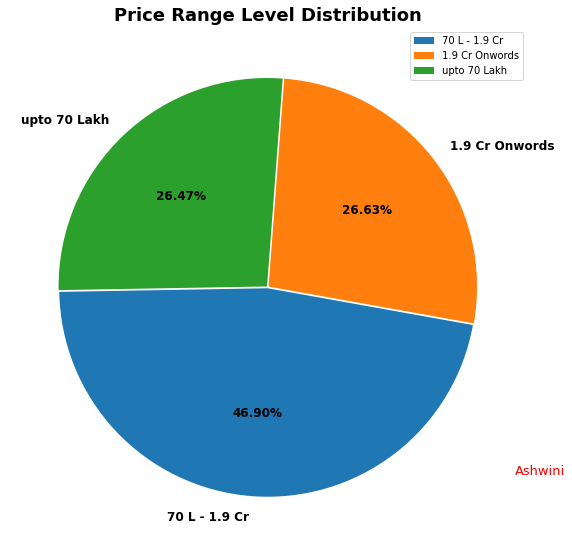

In [50]:
fig = plt.figure(figsize = (8,8))

plt.pie(mum_prop['Price_Cat'].value_counts(), labels= ['70 L - 1.9 Cr','1.9 Cr Onwords','upto 70 Lakh'],
        explode= [0.005,0.005,0.005], autopct= '%.2f%%', startangle= 181, textprops= {'size':'large','fontweight':'bold'})
plt.legend(loc= 'upper right')
plt.title("Price Range Level Distribution", fontsize = 18, fontweight = 'bold')
fig.text(0.9, 0.15, 'Ashwini', fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

fig.savefig('Price_Range_Distribution', dpi = 500)
plt.show()

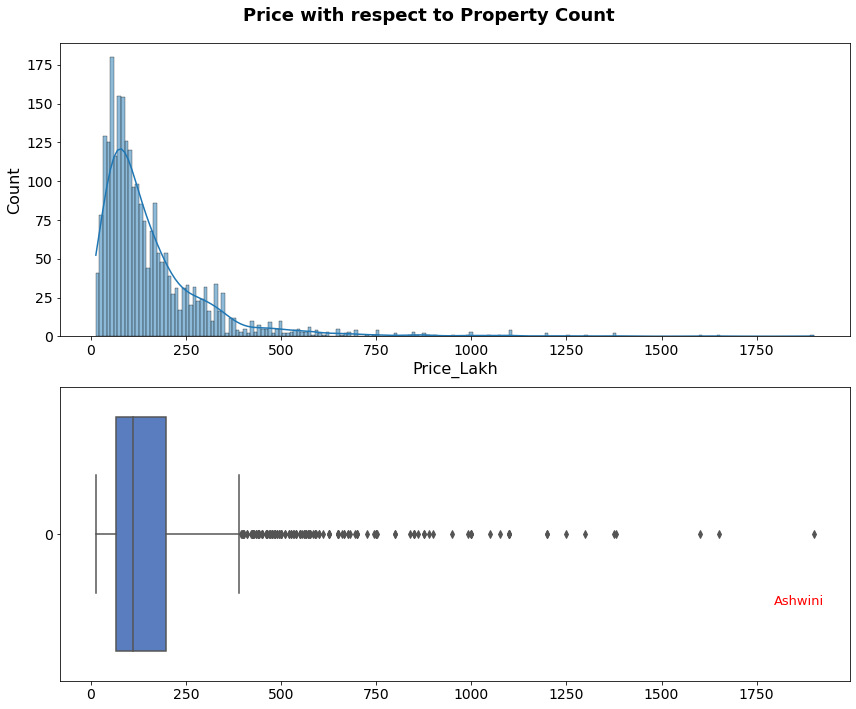

In [51]:
fig, ax = plt.subplots(2,1, figsize = (12,10))

fig.suptitle('Price with respect to Property Count', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Ashwini', fontsize = 13, color ='red')
sns.histplot(ax= ax[0],data=mum_prop["Price_Lakh"], kde =  True, bins = 200)
sns.boxplot(ax= ax[1], data=mum_prop["Price_Lakh"], orient="h", palette='muted')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

fig.savefig('Price_Count_Bar', dpi = 500)

## 10. Bar plot Region wise Price

In [52]:
import plotly.graph_objects as px
import plotly.express as go
import numpy as np

x = mum_prop['Region']
y = mum_prop['Price_Lakh']

plot = px.Figure(data=[px.Bar(x=x, y=y)])
plot.update_layout(xaxis=dict(rangeselector=dict(buttons=list([dict(count=1,stepmode="backward")])),
                              rangeslider=dict(visible=True)),width=900, height=900)

plot.show()

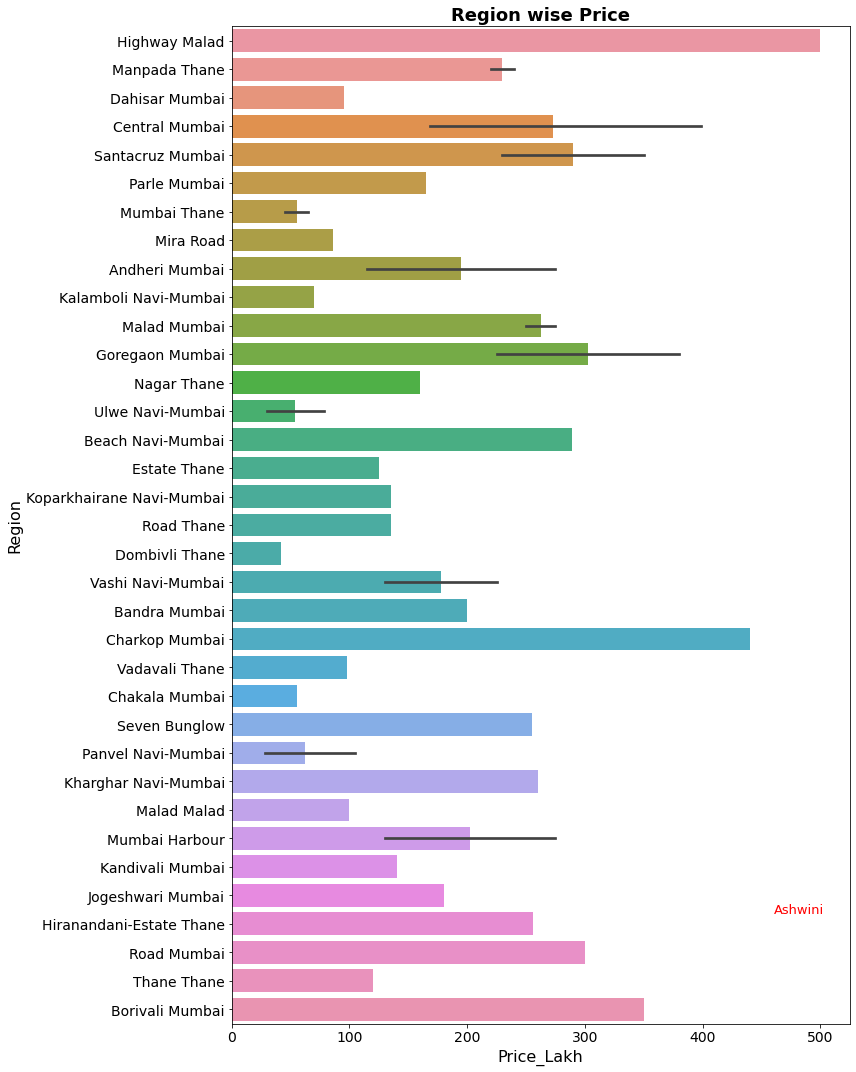

In [54]:
fig  = plt.figure(figsize=(12,15))
sns.barplot(x='Price_Lakh',y='Region',data=mum_prop.head(50))
plt.title('Region wise Price', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Ashwini', fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

fig.savefig('Region_wise_Price_Bar', dpi = 500)

# The End !!